In [3]:
import pandas as pd
import numpy as np

In [4]:
sms = pd.read_csv('spam.csv', encoding = 'iso-8859-1')

In [5]:
sms.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [6]:
sms.shape

(5572, 5)

In [7]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:

# 1. Data Cleaning 
# 2. Exploratory Data Analysis
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement

# Data Cleaning 

In [9]:
sms = sms.iloc[:,:-3]

In [10]:
sms.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
sms = sms.rename(columns = {'v1':'target', 'v2':'text'})

In [12]:
sms.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [14]:
sms['target'] = encoder.fit_transform(sms['target'])

In [15]:
sms.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# check the missing values 
sms.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
# check for duplicated values 
sms.duplicated().sum()

403

In [18]:
# removeing the duplicate values 
sms = sms.drop_duplicates(keep ='first')

In [19]:
sms.duplicated().sum()

0

# Exploratory Data analysis 

This gives us the overall understanding of the data

In [20]:
# First we check, how many percent are spam and how many percent are ham

# this shows hams = 4516 and spam are 653

sms['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

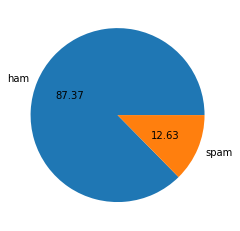

In [21]:
import matplotlib.pyplot as plt
plt.pie(sms['target'].value_counts(), labels = ['ham','spam'], autopct = '%0.2f')
plt.show()

In [22]:
# data is imbalance as ham is more and spam is very less
sms['num_characters'] = sms['text'].apply(len)

In [23]:
sms.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
import nltk

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/arjitsharma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
# num of word
sms['num_words'] = sms['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [27]:
sms.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
sms['num_sentences'] = sms['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [29]:
sms[['num_characters','num_words',"num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [30]:
# Ham messages
sms[sms['target'] == 0][['num_characters','num_words',"num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [31]:
# spam messages
sms[sms['target'] == 1][['num_characters','num_words',"num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [32]:
import seaborn as sns

<AxesSubplot:xlabel='num_words', ylabel='Count'>

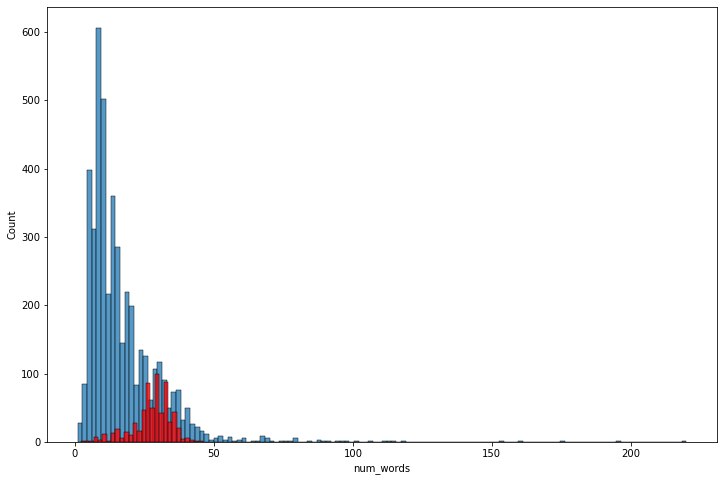

In [33]:
# Plotting the histograms
plt.figure(figsize=(12,8))
sns.histplot(sms[sms['target'] == 0]['num_words']) # ham messages
sns.histplot(sms[sms['target'] == 1]['num_words'], color= 'red') # spam messages 

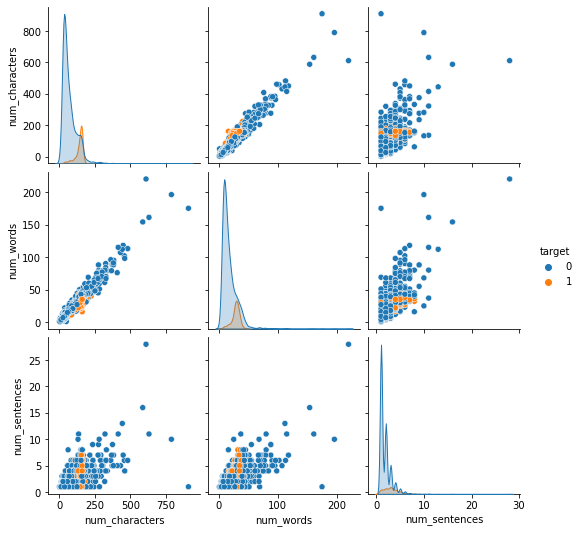

In [34]:
sns.pairplot(sms, hue='target')

'\nhere we will be keeping the num_characters column because we can see a multi-collinearity with all the three variables,\nhowever num_characters has moderate correaltion with target\nSo, we keep that columm/feature\n\n'

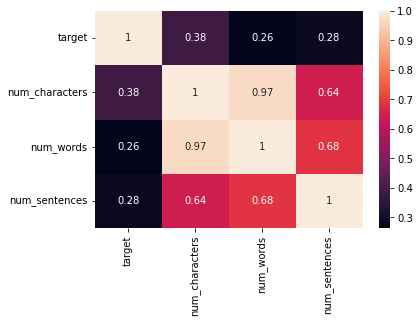

In [35]:
sns.heatmap(sms.corr(), annot=True)

'''
here we will be keeping the num_characters column because we can see a multi-collinearity with all the three variables,
however num_characters has moderate correaltion with target
So, we keep that columm/feature

'''



# Data Preprocessing 
1. Lower Case
2. Tokenize 
3. Special character removal
4. Stop words removal/puntuation removal
5. Stemming/lematization - remove similar meaning words

In [36]:
import string
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
punctuations = string.punctuation
from nltk.stem.porter import PorterStemmer 
ps = PorterStemmer()


def transform_text(text):
    
    # lower case
    text = text.lower()
    
    # tokenize
    text = text.split(' ')
    
    # special character removal
    new_list = []
    
    for word in text:
        if word.isalnum():
            new_list.append(word)
    
    #clear the new_list
    text = new_list[:] 
    new_list.clear()
    
    for word in text:
        if word not in stop_words and word not in punctuations:
            new_list.append(word)
    
    text = new_list[:] 
    new_list.clear()
    
    for word in text:
        new_list.append(ps.stem(word))
            
    return ' '.join(new_list)

In [37]:
transform_text('I learned youtube lectures on machine learning, how about YOU ?')

'learn youtub lectur machin'

In [38]:
sms['transformed_text'] = sms['text'].apply(transform_text)  

In [39]:
sms.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong avail bugi n great world la e cine g...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok joke wif u
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli u c alreadi
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe live around though


In [40]:
list_spams = sms[sms['target'] == 1]['transformed_text'].tolist()

In [41]:
# counting the number of words
spam_corpus = []
for line in list_spams:
    for word in line.split():
        spam_corpus.append(word)
        
word_dict = {}
for item in spam_corpus:
    if item not in word_dict:
        word_dict[item] = 1
    word_dict[item] += 1

In [42]:
new_list = list((key,value) for key,value in word_dict.items())

In [43]:
decending_spam_words = sorted(new_list, reverse = True, key = lambda x : x[1])

In [44]:
spam_df = pd.DataFrame(decending_spam_words[:31])

/Users/arjitsharma/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


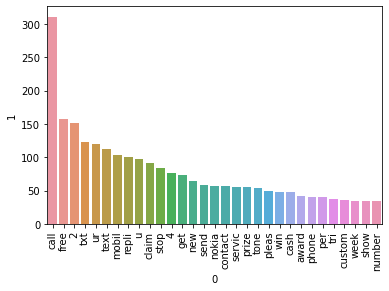

In [45]:
sns.barplot(spam_df[0],spam_df[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [46]:
list_ham = sms[sms['target'] == 0]['transformed_text'].tolist()

In [47]:
# counting the number of words
ham_corpus = []
for line in list_ham:
    for word in line.split():
        ham_corpus.append(word)
        
word_dict = {}
for item in ham_corpus:
    if item not in word_dict:
        word_dict[item] = 1
    word_dict[item] += 1

In [48]:
new_list = list((key,value) for key,value in word_dict.items())

In [49]:
decending_ham_words = sorted(new_list, reverse = True, key = lambda x : x[1])

In [50]:
ham_df = pd.DataFrame(decending_ham_words[:31])

/Users/arjitsharma/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


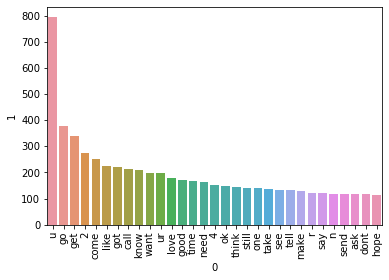

In [51]:
sns.barplot(ham_df[0],ham_df[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [52]:
"""
the above analysis shows the top 30 words and there count used in spam corpus and ham corpus
"""

'\nthe above analysis shows the top 30 words and there count used in spam corpus and ham corpus\n'

# Model Building

In [100]:
# we will use naive bayes - it works best at the textual data (bag of words)

# we need to convert 'transformed_text' column into vector/number

'''
below to improve the accuracy/precision we will do it with TFIDF 
'''

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [80]:
X = tfidf.fit_transform(sms['transformed_text']).toarray()

In [81]:
X.shape

(5169, 4000)

Train Test Split

In [82]:
y = sms['target'].values

In [83]:
y.shape

(5169,)

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

In [86]:
y_train.shape

(4135,)

In [87]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [88]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [89]:
# Gaussian Naive Bayes
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.7940038684719536
[[707 189]
 [ 24 114]]
0.37623762376237624


In [90]:
#Multinomial Naive Bayes
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
y_pred2

print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2)) 

#precision score increase when used TfIdf

0.9584139264990329
[[896   0]
 [ 43  95]]
1.0


In [91]:
#Bernoulie Naive Bayes
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
y_pred3

print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3)) # this shows the true positives (which means is detecting the spam messages)

0.9729206963249516
[[893   3]
 [ 25 113]]
0.9741379310344828


#### Above we use the Multinomial Naive Bayes as this shows the maximum precision using the TfIdfVectorisor

In [92]:
########################################################################################################

In [93]:
# Using other machine learning models

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier ,RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

In [95]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [96]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
}

In [97]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [98]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.965183752417795
Precision -  0.925
For  KN
Accuracy -  0.8994197292069632
Precision -  1.0
For  NB
Accuracy -  0.9584139264990329
Precision -  1.0
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8514851485148515
For  LR
Accuracy -  0.9506769825918762
Precision -  0.9306930693069307
For  RF
Accuracy -  0.9690522243713733
Precision -  0.9818181818181818
For  AdaBoost
Accuracy -  0.9593810444874274
Precision -  0.9210526315789473
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8861788617886179
For  ETC
Accuracy -  0.971953578336557
Precision -  0.9739130434782609
For  GBDT
Accuracy -  0.9497098646034816
Precision -  0.9056603773584906


In [73]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

# here we can see the Naive Bayes performs better with more precision and accuracy also
# but RF and ETC are also good

,Algorithm,Accuracy,Precision
1,KN,0.898453,1.000000
2,NB,0.951644,1.000000
8,ETC,0.971954,0.982301
5,RF,0.970019,0.981982
4,LR,0.949710,0.938776
0,SVC,0.965184,0.932203
6,AdaBoost,0.956480,0.926606
9,GBDT,0.949710,0.898148
7,BgC,0.958414,0.874016
3,DT,0.936170,0.852941


In [74]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [75]:
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.898453,1.000000
2,NB,0.951644,1.000000
8,ETC,0.971954,0.982301
5,RF,0.970019,0.981982
4,LR,0.949710,0.938776
0,SVC,0.965184,0.932203
6,AdaBoost,0.956480,0.926606
9,GBDT,0.949710,0.898148
7,BgC,0.958414,0.874016
3,DT,0.936170,0.852941


In [76]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [77]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.898453,1.000000,0.898453,1.000000
1,NB,0.951644,1.000000,0.951644,1.000000
2,ETC,0.971954,0.982301,0.971954,0.982301
3,RF,0.970019,0.981982,0.970019,0.981982
4,LR,0.949710,0.938776,0.949710,0.938776
5,SVC,0.965184,0.932203,0.965184,0.932203
6,AdaBoost,0.956480,0.926606,0.956480,0.926606
7,GBDT,0.949710,0.898148,0.949710,0.898148
8,BgC,0.958414,0.874016,0.958414,0.874016
9,DT,0.936170,0.852941,0.936170,0.852941


In [464]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
pickle.dump(transform_text, open('transform.pkl','wb'))
pickle.dump(etc,open('etc_model.pkl','wb'))

In [78]:
import pickle
pickle.dump(etc,open('etc_model.pkl','wb'))